In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import re
import matplotlib.patches as patches
import matplotlib
!pip install inflect
import inflect

In [2]:
data = pd.read_csv("Warehouse_dataPRICE.csv")
data.head()

,index,Product,Product_ID,Arrival,Maximum,Weight(kg)
0,0,Apple,3d7baeff-1387-490a-9981-04234e88299a,2013-06-16,120.0,110.0
1,1,Banana,666473ac-2a7f-476d-9001-cf98ffe7259c,2013-06-16,80.0,75.0
2,2,Brinjal Long,6d0ecdf6-efed-41c0-8a1f-aa813a1ab73f,2013-06-16,18.0,17.0
3,3,Brocauli,e4e405bc-d99b-4fbf-bb35-2e08fd6a8862,2013-06-16,80.0,75.0
4,4,Carrot,d95b26ec-17e4-448d-b8e1-8c9f74ce61b7,2013-06-16,35.0,32.5


In [3]:
data.describe()

,index,Maximum,Weight(kg)
count,38379.000000,38379.000000,38379.000000
mean,19189.000000,90.739727,86.785690
std,11079.207327,103.442130,97.278454
min,0.000000,12.000000,10.000000
25%,9594.500000,38.000000,35.000000
50%,19189.000000,60.000000,57.500000
75%,28783.500000,100.000000,95.000000
max,38378.000000,1500.000000,1475.000000


In [4]:
data.dtypes

index           int64
Product        object
Product_ID     object
Arrival        object
Maximum       float64
Weight(kg)    float64
dtype: object

In [5]:
def parse_date(date_str):
    try:
        parsed_date = parser.parse(date_str)
        standardized_date = parsed_date.strftime("%Y-%m-%d")
        return standardized_date
    except Exception as e:
        return None
data["Arrival"] = data["Arrival"].apply(parse_date)
data["Arrival"] = pd.to_datetime(data["Arrival"])

In [6]:
data["Month"] = data["Arrival"].dt.strftime("%B")
data["Year"] = data["Arrival"].dt.year
data["Arrival"] = data["Arrival"].dt.strftime("%A")

In [7]:
data.head()

,index,Product,Product_ID,Arrival,Maximum,Weight(kg),Month,Year
0,0,Apple,3d7baeff-1387-490a-9981-04234e88299a,Sunday,120.0,110.0,June,2013
1,1,Banana,666473ac-2a7f-476d-9001-cf98ffe7259c,Sunday,80.0,75.0,June,2013
2,2,Brinjal Long,6d0ecdf6-efed-41c0-8a1f-aa813a1ab73f,Sunday,18.0,17.0,June,2013
3,3,Brocauli,e4e405bc-d99b-4fbf-bb35-2e08fd6a8862,Sunday,80.0,75.0,June,2013
4,4,Carrot,d95b26ec-17e4-448d-b8e1-8c9f74ce61b7,Sunday,35.0,32.5,June,2013


In [8]:
data.isnull().sum()

index         0
Product       0
Product_ID    0
Arrival       0
Maximum       0
Weight(kg)    0
Month         0
Year          0
dtype: int64

In [9]:
data["Product"] = data["Product"].str.lower()

In [10]:
print("Total Number of Unique Commodities : ",len(data["Product"].unique()))

Total Number of Unique Commodities :  16


Data Available For Different Years

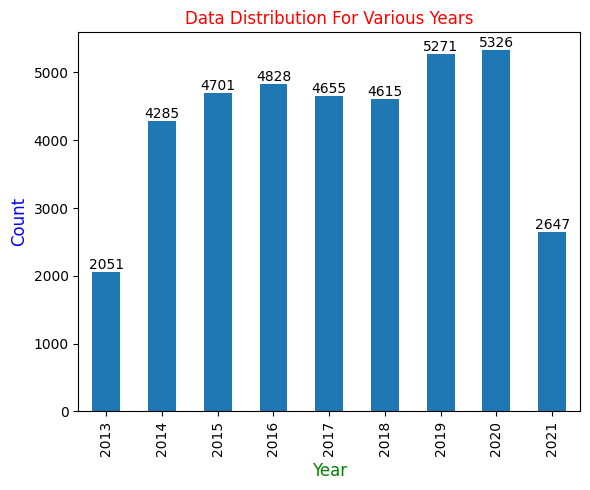

In [11]:
data_magnitude = data.groupby(["Year"])["Year"].count()
plt.figure(figsize = (6,5))
ax = data_magnitude.plot(kind = "bar")



for i,v in enumerate(data_magnitude):
    ax.text(i, v+0.2, str(v), ha = "center", va = "bottom")
    
plt.xlabel("Year", color = "Green", fontsize = 12)
plt.ylabel("Count", color = "Blue", fontsize = 12)
plt.title("Data Distribution For Various Years", color = "Red")
plt.tight_layout()
plt.show()

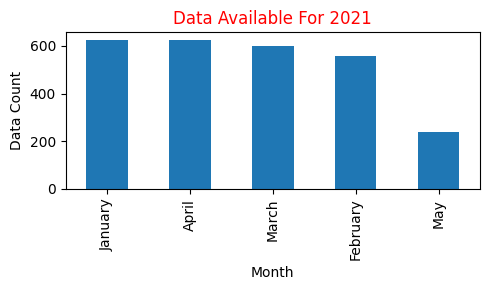

In [12]:
plt.figure(figsize = (5,3))
data[data["Year"]==2021]["Month"].value_counts().plot(kind = "bar")
plt.xlabel("Month")
plt.ylabel("Data Count")
plt.title("Data Available For 2021", color = "Red")
plt.tight_layout()
plt.show()

Items With Highest Price Fluctuation - Yearwise

In [13]:
items_avg_years = data.groupby(["Year", "Product"])["Maximum"].mean().unstack(level = 0).fillna(value = 0)

In [14]:
def count_zeros(row):
    return (row==0).sum()
zero_count = items_avg_years.apply(count_zeros, axis = 1)

In [15]:
filtered_items_avg_zero_lesseq5 = items_avg_years[(zero_count<=5)&(zero_count<=3)]

In [16]:
filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100

In [17]:
sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

In [18]:
top_10_variations.head()

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,Coefficient of Variation
Product,,,,,,,,,,
lime,405.350318,463.474026,496.389685,450.274725,552.691218,332.872928,221.564246,134.444444,189.128788,41.194139
apple,116.891026,137.749196,112.293447,112.087912,109.263456,105.564738,173.548753,205.521472,246.600000,34.615169
raddish red,38.200000,33.731707,33.037383,33.990476,28.632812,30.047619,24.975000,50.217391,59.554455,30.017331
grapes,238.461538,150.956522,150.274390,124.503311,127.124183,157.635135,126.993007,204.695652,216.679688,25.689834
potato white,27.050955,30.655844,20.199430,29.557423,23.821530,33.480122,31.878788,45.087248,23.408696,24.817534


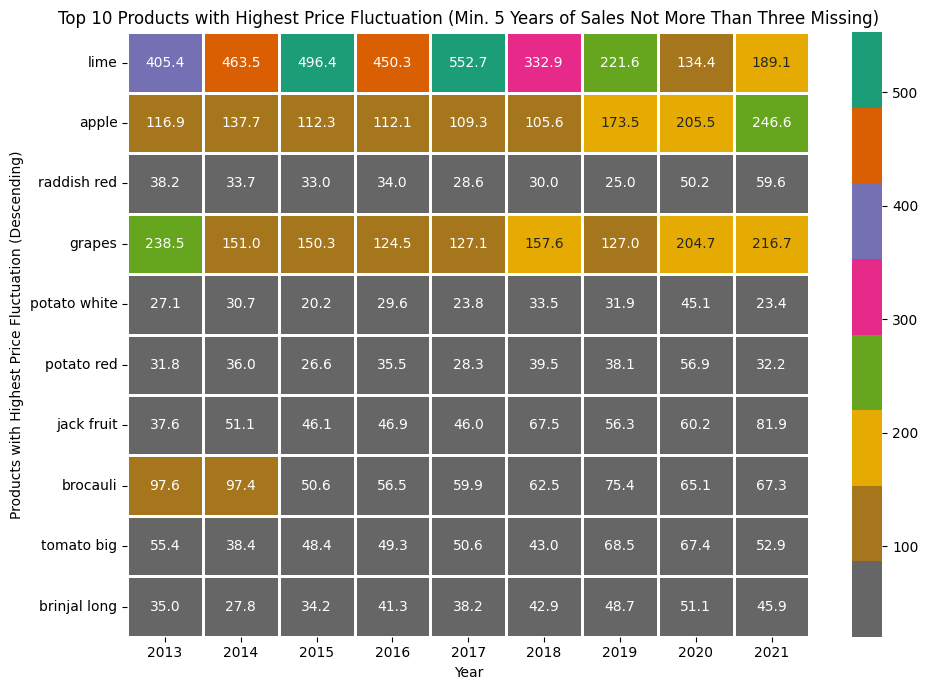

In [19]:
plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Products with Highest Price Fluctuation (Descending)")
plt.xlabel("Year")
plt.title("Top 10 Products with Highest Price Fluctuation (Min. 5 Years of Sales Not More Than Three Missing)", fontsize = 12)
plt.tight_layout()

Items With Lowest Price Fluctuation - Yearwise

In [20]:
#items_avg_years = data.groupby(["Year", "Product"])["Maximum"].mean().unstack(level = 0).fillna(value = 0)

#def count_zeros(row):
    #return (row==0).sum()
#zero_count = items_avg_years.apply(count_zeros, axis = 1)

#filtered_items_avg_zero_lesseq5 = items_avg_years[(zero_count<=5)&(zero_count>0)]

#filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100

#sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
#less_10_variations = sorted_items.head(10)

#plt.figure(figsize = (10,7))

#sns.heatmap(less_10_variations.iloc[:,:-1], 
            #linewidths = 1,
            #cmap='Set1_r', 
            #annot = True,
           #fmt = ".1f")
#plt.ylabel("Product with Lowest Price Fluctuation (Ascending)")
#plt.xlabel("Year")
#plt.title("Top 10 Products with Lowest Price Fluctuation (Min. 5 Years of Sales With Atleast One Missing", fontsize = 12)
#plt.tight_layout()




IndentationError: unexpected indent (3376090405.py, line 12)

Seasonal Analysis

In [ ]:
data.head()

Spring (March-May) Summer (June-August) Autumn (September-November) Winter (December-February)

In [ ]:
month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn',
    'December': 'Winter'
}

data["Season"] = data["Month"].map(month_to_season)
data.head()

In [ ]:
items_avg_season = data.groupby(["Season", "Product"])["Maximum"].median().unstack(level = 0).fillna(value = 0)
items_avg_season.head(10)

Items With Highest And Lowest Price Fluctuation Seasonal

In [ ]:
def count_zeros(row):
    return (row==0).sum()
zero_count = items_avg_season.apply(count_zeros, axis = 1)

In [ ]:
filtered_items_avg_zero_lesseq5 = items_avg_season[(zero_count<=3)]

In [ ]:
filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100
sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Product with Highest Price Fluctuation (Descending)")
plt.xlabel("Season")
plt.title("Top 10 Product with Highest Price Fluctuation (Min. 5 Years of Sales Atleast One Missing", fontsize = 12)
plt.tight_layout()

In [ ]:
sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)


plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Product with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Products with Lowest Price Fluctuation (Min. 5 Years of Sales Atleast One Missing)", fontsize = 12)
plt.tight_layout()


In [ ]:
sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)



plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Product with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Products With Lowest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()


In [ ]:
filtered_items_avg_zero_no = items_avg_season[zero_count==0]

filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100

sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)


plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Product with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Products With Highest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()


In [ ]:

sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)



plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Product with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Products With Lowest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()

Analyzing the Most Expensive and Least Expensive Product Over the Years and Seasonwise

In [ ]:
max_price = data.groupby(["Year", "Product"])["Maximum"].max().unstack(level = 1).fillna(value = 0)
max_price.head()

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.2f}'.format(p = pct,v=val)+"%)"
    return my_autopct

In [ ]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for year in max_price.index:
    top5 = max_price.loc[year].nlargest(5)
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Most Expensive Products in {year}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    

In [21]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for year in max_price.index:
    top5 = max_price.loc[year][max_price.loc[year]>0].nsmallest(5)
    
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Least Expensive products in {year}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    

NameError: name 'max_price' is not defined

Seasonwise Most Expensive

In [22]:
max_price = data.groupby(["Season", "Product"])["Maximum"].max().unstack(level = 1).fillna(value = 0)
max_price.head()

KeyError: 'Season'

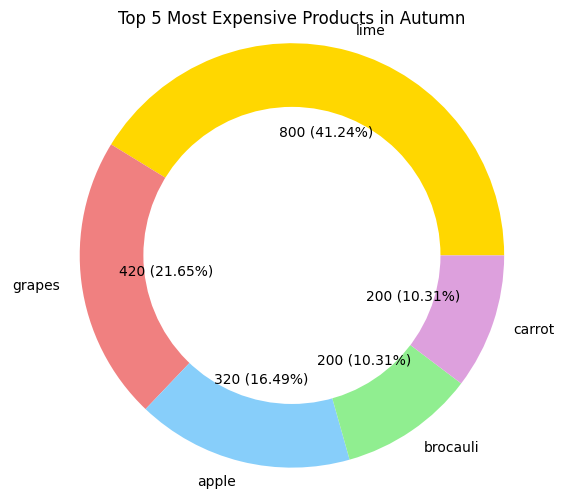

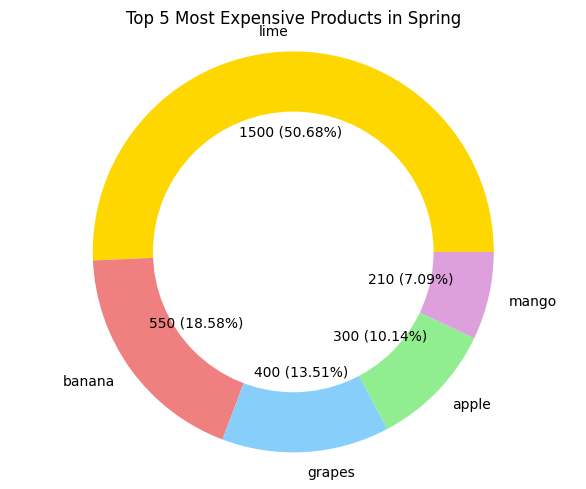

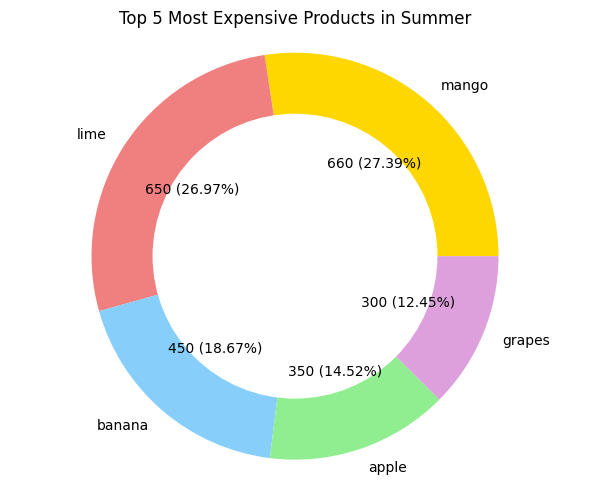

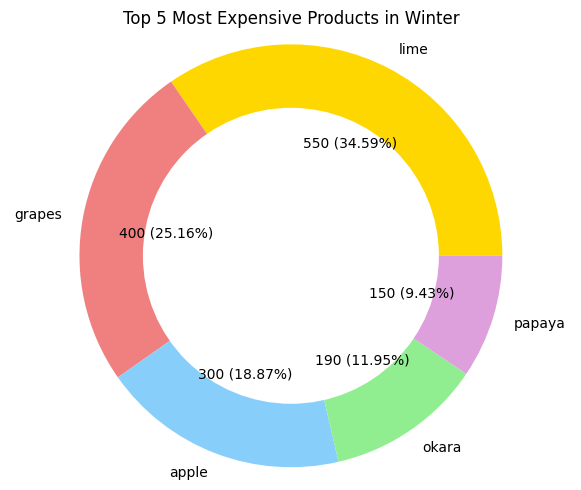

In [79]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for season in max_price.index:
    top5 = max_price.loc[season].nlargest(5)
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Most Expensive Products in {season}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

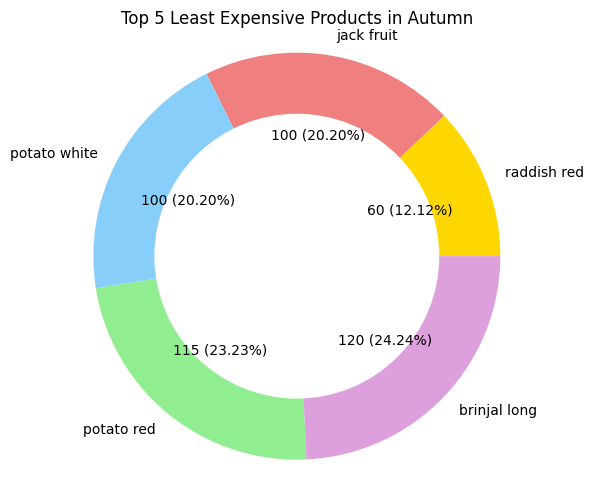

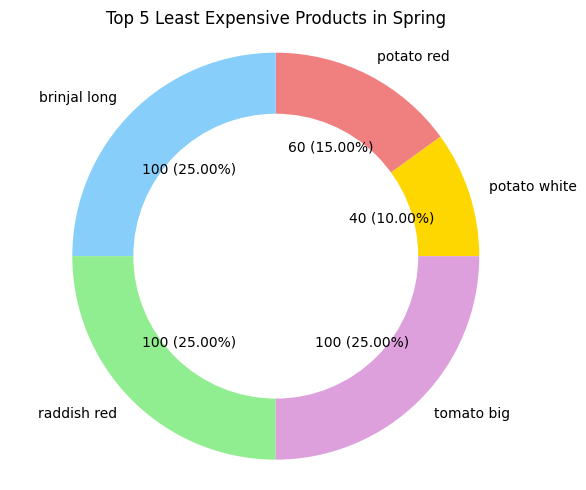

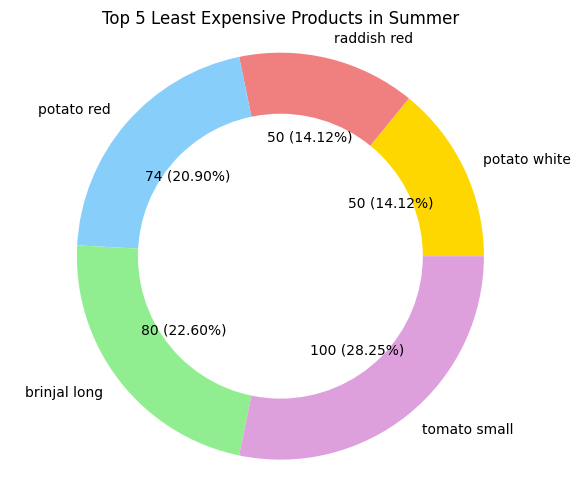

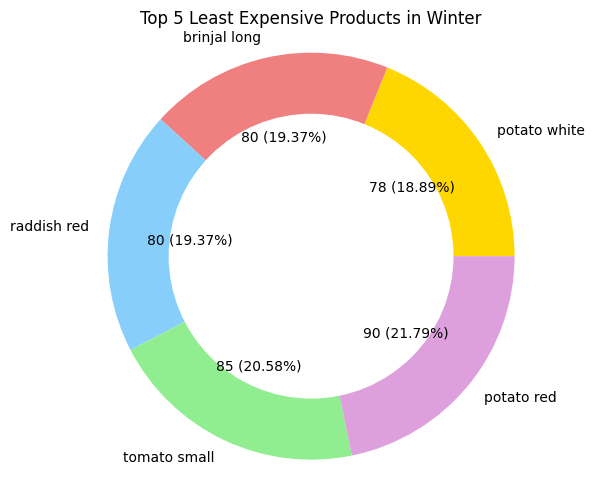

In [80]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for season in max_price.index:
    top5 = max_price.loc[season][max_price.loc[season]>0].nsmallest(5)
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Least Expensive Products in {season}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

In [4]:
df = pd.read_csv("Farmer_dataPRICE.csv")

In [5]:
df.head()

,Name,id,Product,Weight(kg),Arrival,BestBefore,Maximum
0,shefali,-2298907791602927432,Tomato Big,37.5,2013-06-16,2013-06-22,40.0
1,anushka,-3763883785994142627,Tomato Small,29.0,2013-06-16,2013-06-22,32.0
2,mehtab,-7306772913005020966,Potato Red,20.5,2013-06-16,2013-06-22,21.0
3,mercy,-5690939918981728182,Potato White,15.5,2013-06-16,2013-06-22,16.0
4,mehnaz,-6840582954423772625,Carrot,32.5,2013-06-16,2013-06-22,35.0


In [8]:
grouped_data = df.groupby(['Name', 'Product'])['Weight(kg)'].sum().unstack()

In [9]:
grouped_data

Product,Apple,Banana,Brinjal Long,Brocauli,Carrot,Grapes,Jack Fruit,Lime,Mango,Okara,Papaya,Potato Red,Potato White,Raddish Red,Tomato Big,Tomato Small
Name,,,,,,,,,,,,,,,,
aamina,12762.5,8175.0,3831.5,3527.5,5808.5,6652.5,2831.5,24145.0,3987.5,6131.5,7302.0,4521.0,2162.0,662.5,5636.0,5756.0
anushka,14850.0,9017.5,2924.0,3800.0,5655.5,7037.5,2317.5,27570.0,3370.0,5610.5,7021.0,3479.5,1843.0,1277.5,4586.0,5871.0
divy,14312.5,7805.0,3149.5,5356.5,5696.5,8850.0,2736.5,33785.0,3205.0,6395.0,6890.0,4094.0,2278.0,841.5,5012.5,5229.0
fakir,13495.0,6377.5,3397.0,3038.5,6064.0,7555.0,3190.0,25270.0,3900.0,4727.5,6765.0,4041.0,1951.5,1377.5,4907.0,5308.5
guldasta,12700.0,5871.5,3601.0,4180.0,5292.5,8910.0,2582.0,36155.0,3292.5,6741.5,6832.5,4050.0,2504.5,784.0,5317.0,5493.0
gulnaz,16575.0,5635.0,3858.0,4606.5,6555.0,8837.5,2318.0,33927.5,2327.5,6097.0,7742.5,4835.0,2250.5,662.5,5444.5,5804.5
haneef,14665.0,6462.5,3758.0,4402.5,5428.0,7000.0,3026.5,31115.0,3255.0,6755.0,6902.5,3817.0,2172.0,796.0,5535.5,4853.0
jagdiesh,13565.0,6754.0,2864.5,3576.5,6206.5,7410.0,2247.0,32770.0,2762.5,5367.0,5585.0,5473.5,2066.5,769.0,4278.0,5144.0
jasmen,15250.0,6695.0,3815.0,3957.0,5964.0,9612.5,2202.5,27945.0,3125.0,5940.5,7722.5,5114.5,2426.5,749.0,4392.5,4913.5


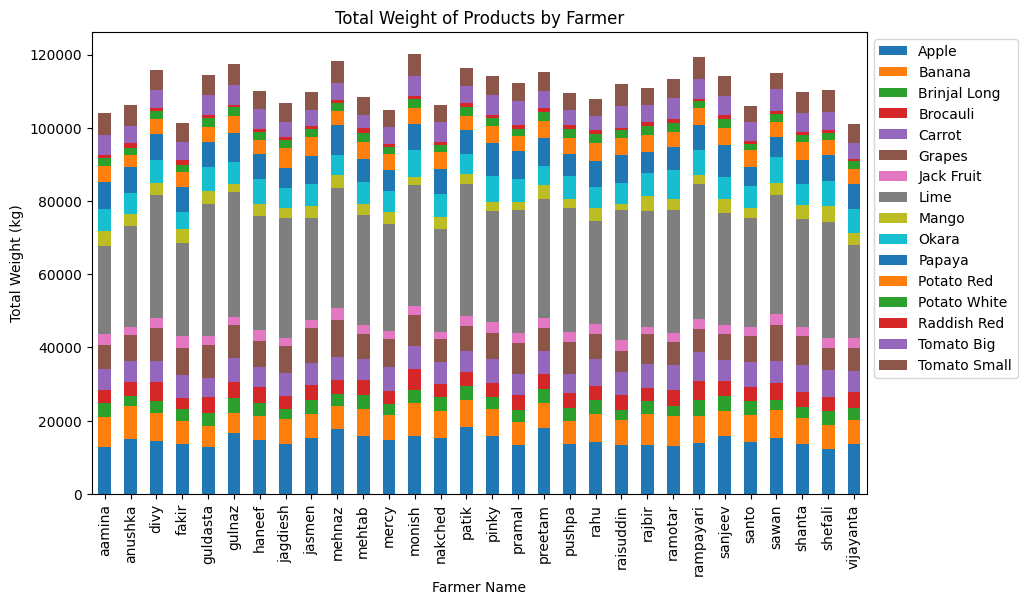

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Farmer Name')
plt.ylabel('Total Weight (kg)')
plt.title('Total Weight of Products by Farmer')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


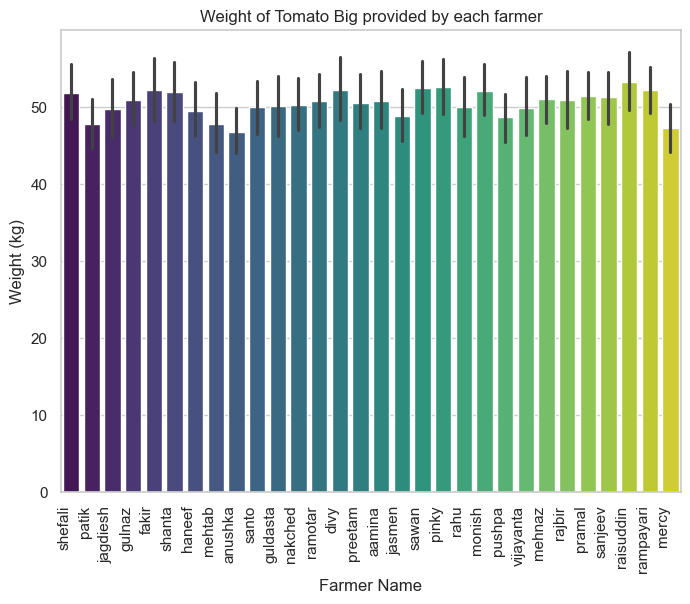

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


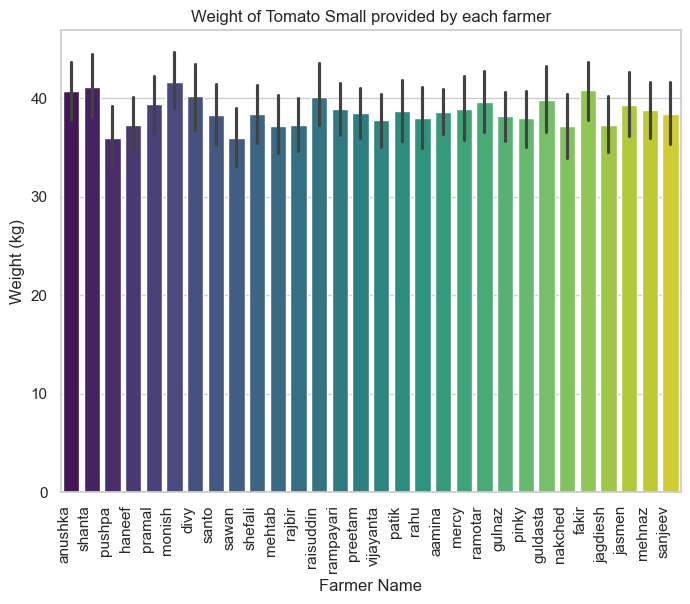

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


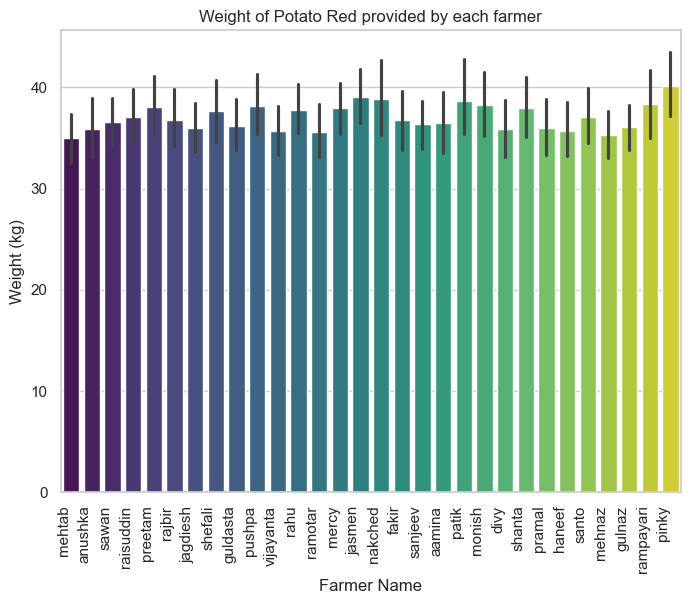

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


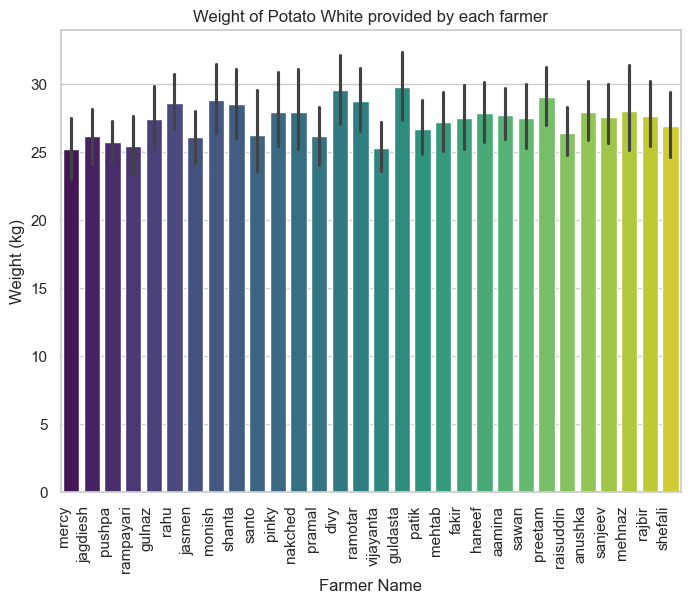

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


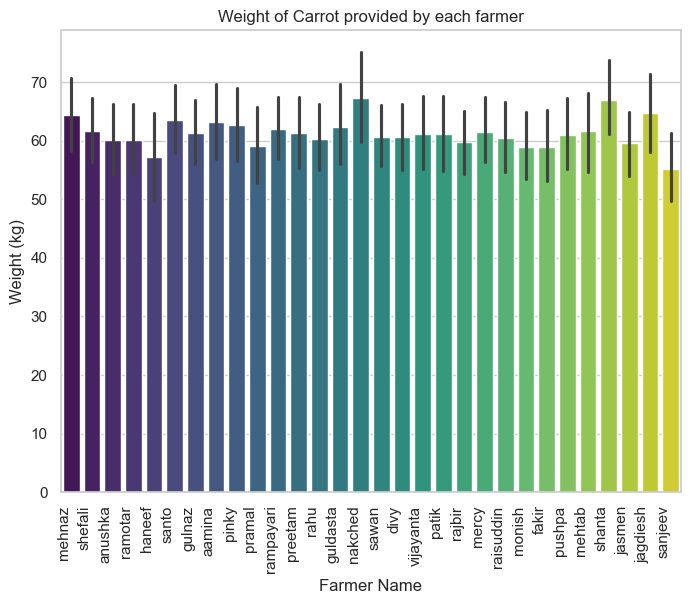

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


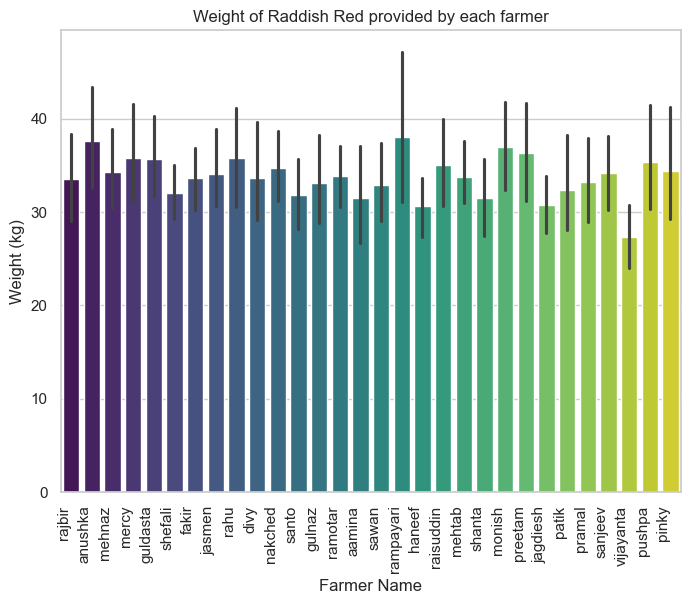

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


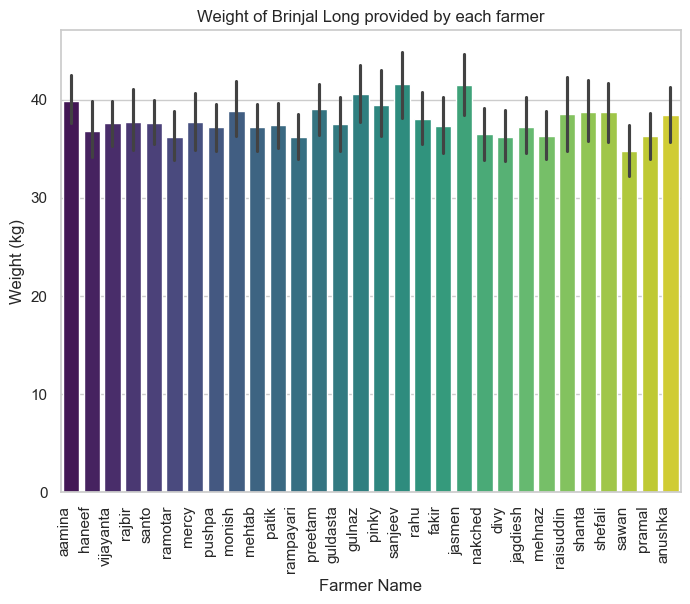

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


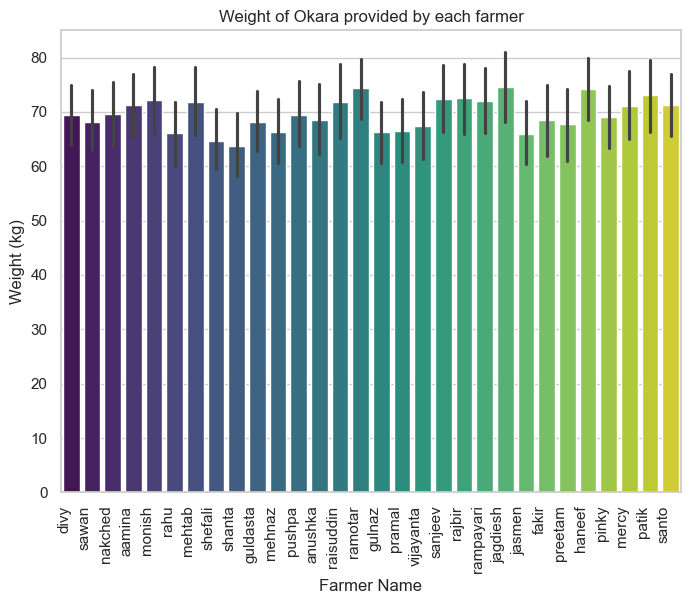

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


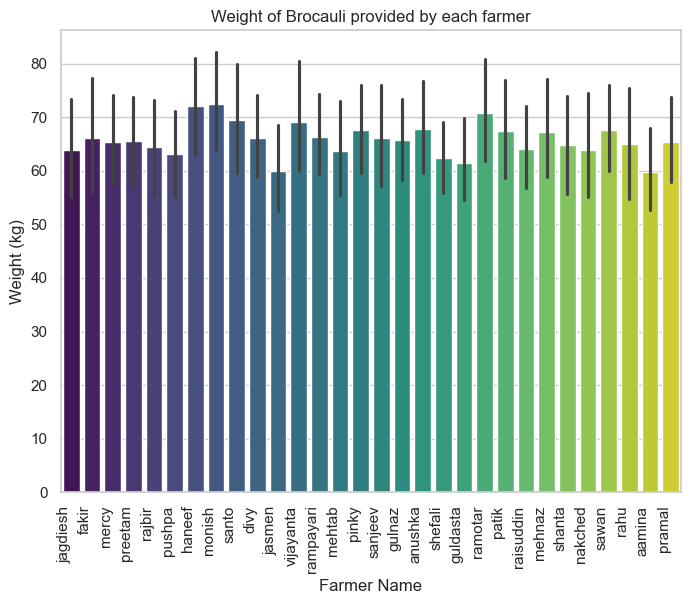

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


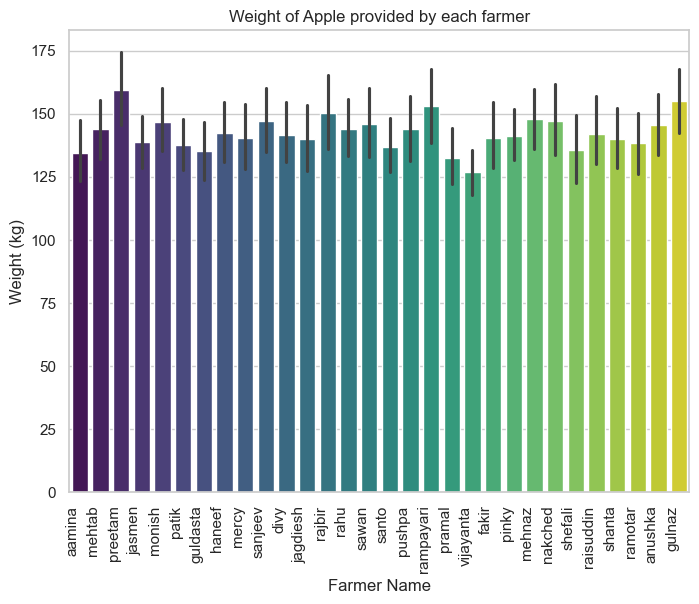

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


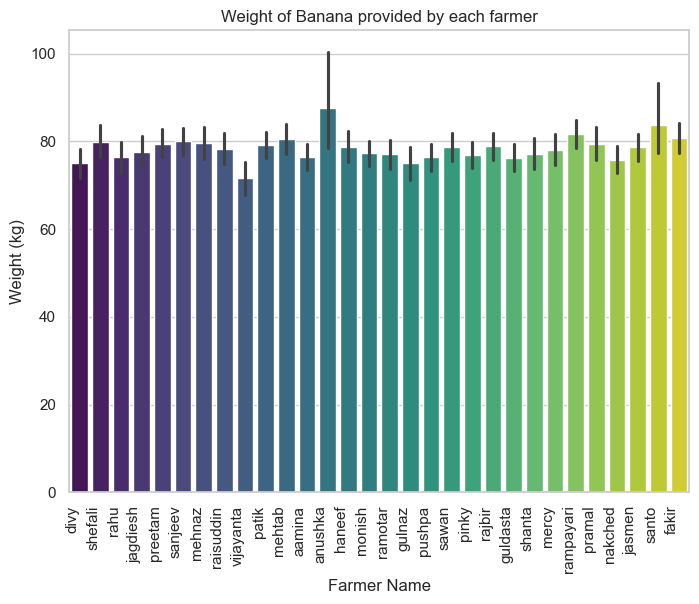

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


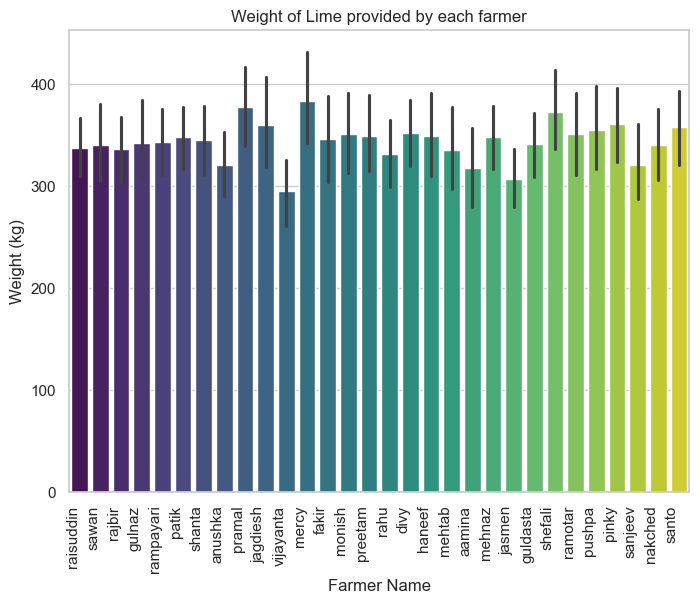

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


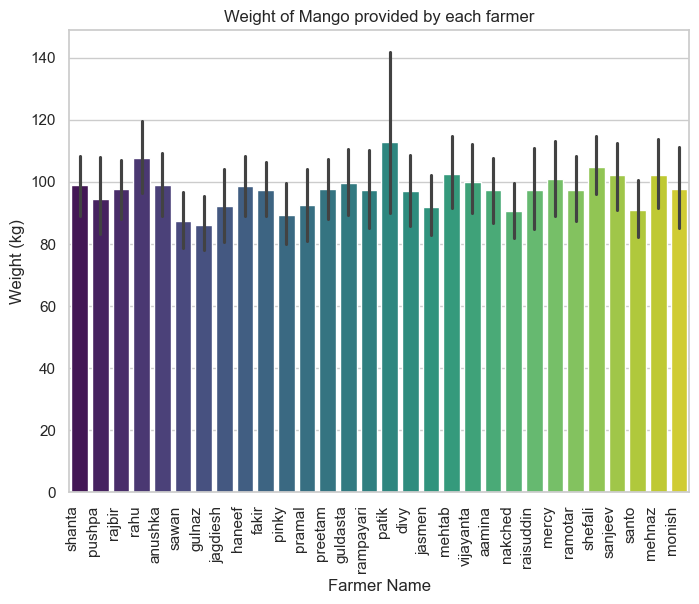

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


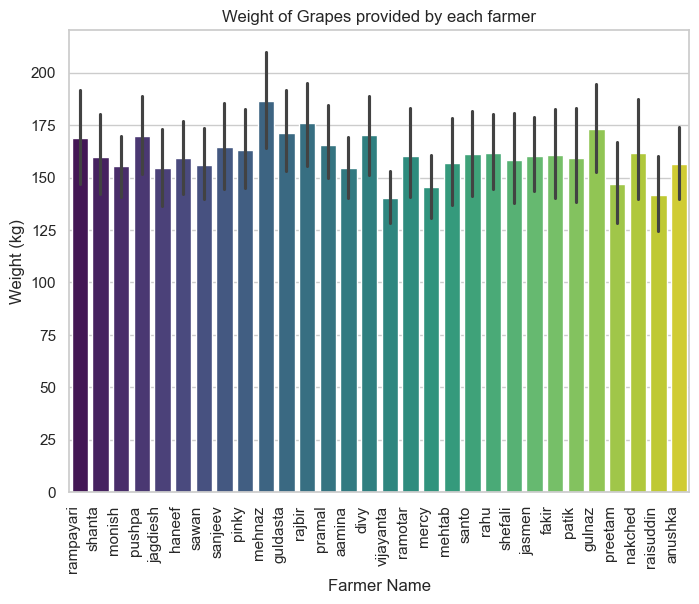

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


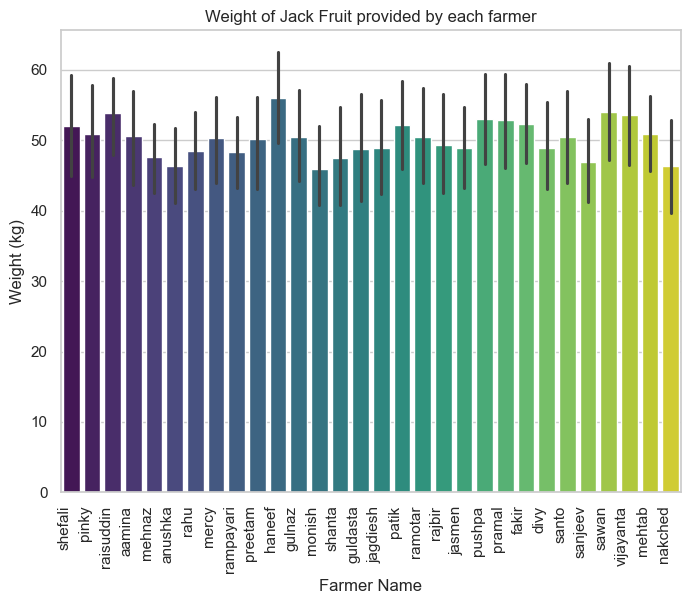

C:\Users\acer\AppData\Local\Temp\ipykernel_27252\403034216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')


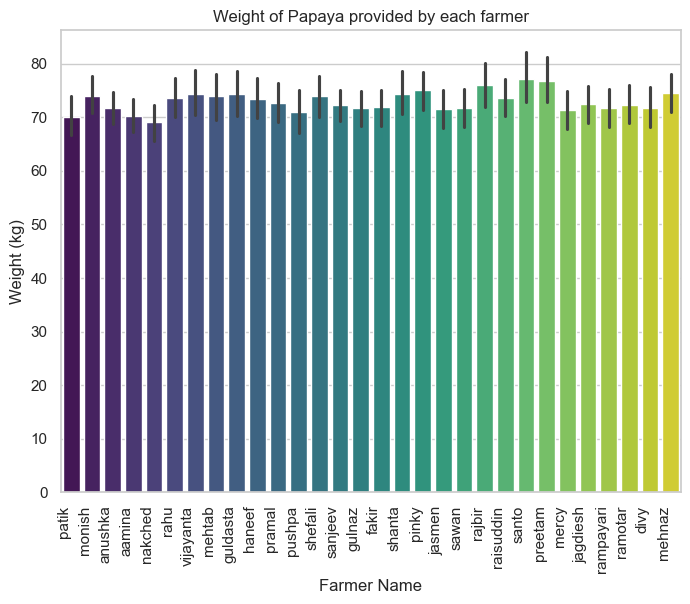

In [14]:
sns.set(style="whitegrid")

for product in df['Product'].unique():
    plt.figure(figsize=(8, 6))
    product_df = df[df['Product'] == product]
    sns.barplot(x='Name', y='Weight(kg)', data=product_df, palette='viridis')
    plt.xlabel('Farmer Name')
    plt.ylabel('Weight (kg)')
    plt.title(f'Weight of {product} provided by each farmer')
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [15]:
df

,Name,id,Product,Weight(kg),Arrival,BestBefore,Maximum
0,shefali,-2298907791602927432,Tomato Big,37.5,2013-06-16,2013-06-22,40.0
1,anushka,-3763883785994142627,Tomato Small,29.0,2013-06-16,2013-06-22,32.0
2,mehtab,-7306772913005020966,Potato Red,20.5,2013-06-16,2013-06-22,21.0
3,mercy,-5690939918981728182,Potato White,15.5,2013-06-16,2013-06-22,16.0
4,mehnaz,-6840582954423772625,Carrot,32.5,2013-06-16,2013-06-22,35.0
...,...,...,...,...,...,...,...
39456,sanjeev,2699564478308651307,Mango,145.0,2021-05-13,2021-05-19,150.0
39457,rampayari,2968148604061203207,Grapes,225.0,2021-05-13,2021-05-19,250.0
39458,pinky,-788253433629545359,Jack Fruit,45.0,2021-05-13,2021-05-19,50.0
39459,anushka,-3763883785994142627,Papaya,65.0,2021-05-13,2021-05-19,70.0


In [16]:
df_retail = pd.read_csv("Retail_arrival_3.csv")

In [17]:
df_retail

,index,Product,Product_ID,Arrival,Maximum,Weight(kg)
0,0,Apple,3d7baeff-1387-490a-9981-04234e88299a,2013-06-16,120.0,71
1,1,Banana,666473ac-2a7f-476d-9001-cf98ffe7259c,2013-06-16,80.0,154
2,2,Brinjal Long,6d0ecdf6-efed-41c0-8a1f-aa813a1ab73f,2013-06-16,18.0,79
3,3,Brocauli,e4e405bc-d99b-4fbf-bb35-2e08fd6a8862,2013-06-16,80.0,85
4,4,Carrot,d95b26ec-17e4-448d-b8e1-8c9f74ce61b7,2013-06-16,35.0,135
...,...,...,...,...,...,...
38374,38374,Potato Red,08f3acc4-5c89-4a21-ba0c-b1cd10ff55c5,2021-05-13,37.0,64
38375,38375,Tomato Big,69735793-757e-4ae3-91a6-9d2008488d2c,2021-05-13,50.0,85
38376,38376,Tomato Small,71bc2956-caeb-4db5-99ff-afd72743ade0,2021-05-13,35.0,55
38377,38377,Tomato Small,71bc2956-caeb-4db5-99ff-afd72743ade0,2021-05-13,40.0,109


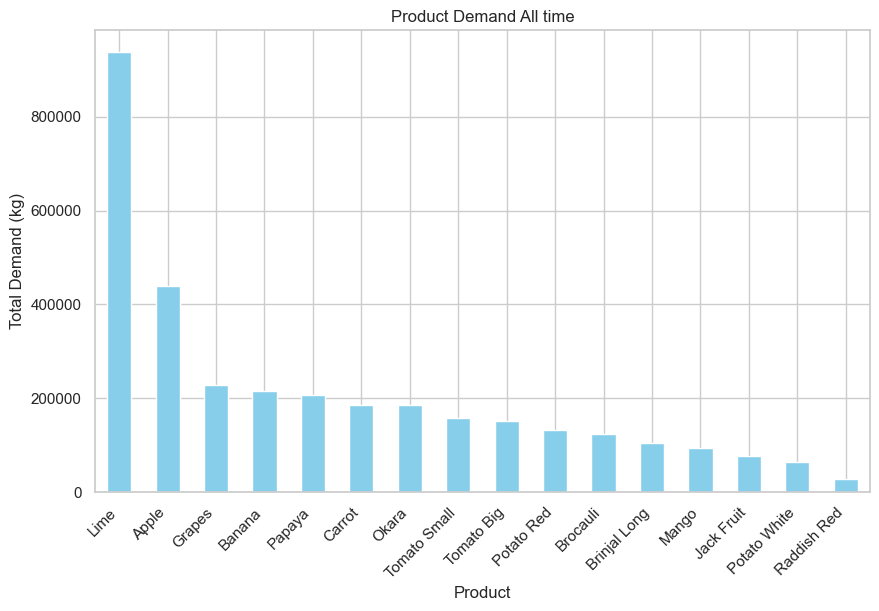

In [19]:
demand_data = df.groupby('Product')['Weight(kg)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
demand_data.plot(kind='bar', color='skyblue')
plt.title('Product Demand All time')
plt.xlabel('Product')
plt.ylabel('Total Demand (kg)')
plt.xticks(rotation=45, ha='right')
plt.show()

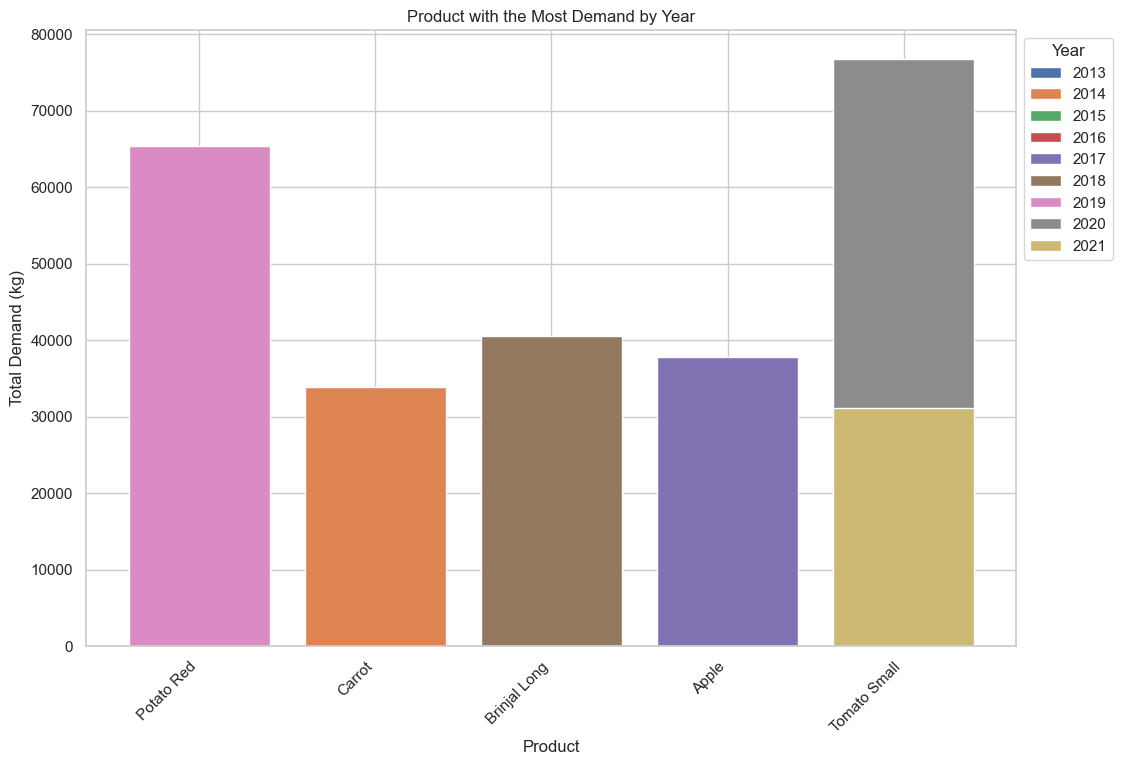

In [22]:
df_retail['Arrival'] = pd.to_datetime(df_retail['Arrival'])
df_retail['Year'] = df_retail['Arrival'].dt.year
demand_data = df_retail.groupby(['Year', 'Product'])['Weight(kg)'].sum().reset_index()
max_demand_per_year = demand_data.loc[demand_data.groupby('Year')['Weight(kg)'].idxmax()]
plt.figure(figsize=(12, 8))
for year, group in max_demand_per_year.groupby('Year'):
    plt.bar(group['Product'], group['Weight(kg)'], label=str(year))

plt.title('Product with the Most Demand by Year')
plt.xlabel('Product')
plt.ylabel('Total Demand (kg)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()